In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# In this project i will examine the iris data set from sklearn

# Loading the data set
dataset = datasets.load_iris()

# Examining the data type
print(type(dataset))

# The data type is a Bunch object
print(dataset.keys())

# Printing the description of the dataset
print(dataset.DESCR)




<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (

In [3]:
# Making a dataframe with pandas
dataset_df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
dataset_df['iris species'] = dataset['target']

# Pandas does not display every column by default, so we need this line
pd.set_option('display.max_columns', None)

print(dataset_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   iris species  
0             0  
1             0  
2             0  
3             0  
4             0  


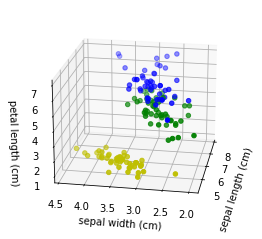

              sepal length (cm)  sepal width (cm)  petal length (cm)  \
iris species                                                           
0                         5.006             3.428              1.462   
1                         5.936             2.770              4.260   
2                         6.588             2.974              5.552   

              petal width (cm)  
iris species                    
0                        0.246  
1                        1.326  
2                        2.026  


In [4]:
# Creating a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Defining the features to be used for the 3D scatter plot
sepal_length = 'sepal length (cm)'
sepal_width = 'sepal width (cm)'
petal_length = 'petal length (cm)'

# Get the data for the three features
x = dataset_df[sepal_length]
y = dataset_df[sepal_width]
z = dataset_df[petal_length]

# Defining the colors for different species
colors = {0: 'y', 1: 'g', 2: 'b'}

# Map the target values to colors and create a list of colors for each data point
colors = [colors[target] for target in dataset_df['iris species']]

# Create the 3D scatter plot
ax.scatter(x, y, z, c=colors, marker='o')

# Set labels for the axes
ax.set_xlabel(sepal_length)
ax.set_ylabel(sepal_width)
ax.set_zlabel(petal_length)

# Set the azimuth and elevation
ax.view_init(azim=-170, elev=20)

# Show the plot
plt.show()

# Calculate the mean values for each feature for each species
mean_values = dataset_df.groupby('iris species').mean()

# Display the mean values
print(mean_values)

The average values are quite close to each other, thus we will need to take a better look at the distribution of features to determine whether they can be used to predict the species. For this we will use a kernel density estimation.

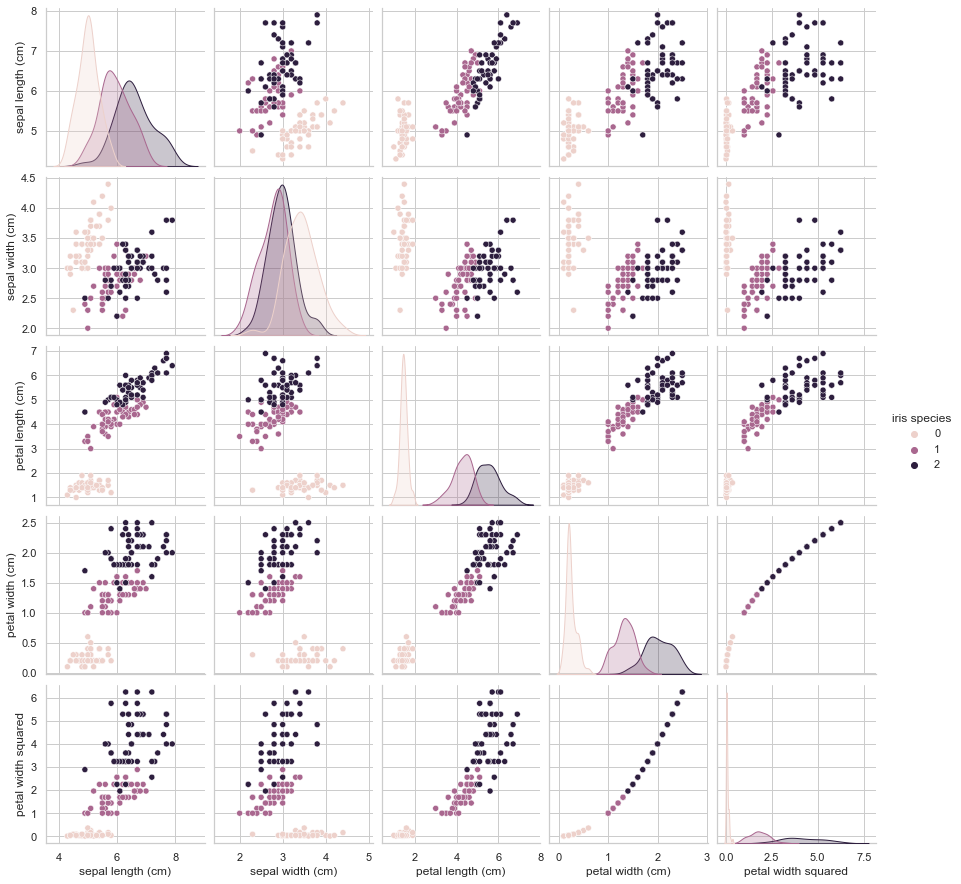

In [5]:
dataset_df['petal width squared'] = dataset_df['petal width (cm)'] ** 2

# Create a pair plot with kernel density plots for each feature
sns.set(style="whitegrid")
sns.pairplot(dataset_df, hue="iris species", diag_kind="kde")

# Show the plot
plt.show()

As we can see from KDE plots, the petal length and petal width seem to be the best predictors for determening the right species as there is less overlap. The summary statistics from the dataset description agrees with this conclusion, as it posed that both petal length and petal width had a high class correlation. However there would be some cases which would be impossible to determine based on these two factors alone, since there is still some overlap between species 1 (Versicolour) and 2 (Virginica).

Machine learning From ChatGPT:
Data Preparation: Prepare your data by splitting it into features (petal width and petal width squared) and labels (species). You'll also need to split the data into training and testing sets.

Model Selection: Choose a classification algorithm to build your model. Common choices include logistic regression, decision trees, random forests, support vector machines, and k-nearest neighbors.

Model Training: Train the selected model on the training data, using petal width and its square as input features and species as the target variable.

Model Evaluation: Evaluate the model's performance on the testing data using appropriate evaluation metrics like accuracy, precision, recall, and F1-score. You can use libraries like scikit-learn to perform this evaluation.

Visualization: You can visualize the decision boundary of your model to see how well it separates the species based on petal width and its square. You may use meshgrid and contour plots to visualize the decision boundary.

Prediction: Once you have a trained model, you can use it to predict the species of new data points based on their petal width and petal width squared.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Features
X = dataset_df[['petal width (cm)', 'petal width squared']]

# Target variable
y = dataset_df['iris species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [7]:
# Performing 5-fold cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean accuracy
mean_accuracy = cross_val_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Scores: [1.         0.96666667 0.9        0.93333333 1.        ]
Mean Accuracy: 0.96
